In [26]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import average_precision_score, precision_score, recall_score
from skimage import io

In [19]:
def get_metrics(img, gt):
    metrics = {
        'TP': 0,
        'FP': 0,
        'TN': 0,
        'FN': 0
    }
    rows, cols = img.shape[:2]
    for row in range(rows):
        for col in range(cols):
            if img[row,col] > 0:
                if gt[row,col] >  0: metrics['TP'] += 1
                else:                metrics['FP'] += 1
            else:
                if gt[row,col] >  0: metrics['FN'] += 1
                else:                metrics['TN'] += 1

    return (metrics['TP'], metrics['TN'], metrics['FP'], metrics['FN'])

In [3]:
img = np.zeros((600,600))
img2 = np.ones((600,600))
gt = np.zeros((600,600,3)).astype(np.float32)
gt = cv2.rectangle(gt, (250,250), (350,350), (255,255,255), -1)
gt = cv2.cvtColor(gt, cv2.COLOR_BGR2GRAY)
gt2 = gt.copy()
gt2[gt2==255] = 1

Text(0.5, 1.0, 'Máscara')

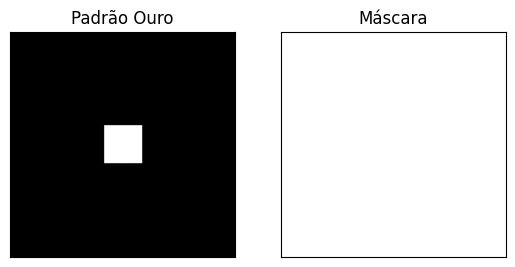

In [4]:
fig, axs = plt.subplots(1,2, sharex=True, sharey=True)
axs[0].imshow(gt2, vmax=1, vmin=0, cmap='gray')
axs[1].imshow(img2, vmax=1, vmin=0, cmap='gray')
axs[0].tick_params(left = False, right = False , labelleft = False , labelbottom = False, bottom = False)
axs[1].tick_params(left = False, right = False , labelleft = False , labelbottom = False, bottom = False)
axs[0].set_title('Padrão Ouro')
axs[1].set_title('Máscara')

In [21]:
PA = ( img.size - np.count_nonzero(img-gt) ) / img.size * 100
#AP = average_precision_score(gt,img2,pos_label=1)

TP,TN,FP,FN = get_metrics(img, gt)
PA2 = (TP+TN)/(TP+TN+FP+FN)
IoU = TP / (TP+FP+FN)

print(PA, PA2, IoU)

97.16638888888889 0.9716638888888889 0.0


In [152]:
i = np.ones((5,5))
gti = np.zeros((5,5))
gti[1,1] = 1
( i.size - np.count_nonzero(i-gti) ) / i.size * 100
#acc = accuracy_score(gti, i, normalize=False)
precision_score(gti,i,pos_label=1, average='samples')
#average_precision_score(gti,i,pos_label=1)
recall_score(gti, i, pos_label=1, average='micro')

1.0